In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
data = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [31]:
data["class"] = [1 if each == "abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [32]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)

In [33]:
#normalizasyon
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=1)

In [35]:
#knn modeli
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors=komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} en yakin komsu modeli test dogruluk: {}". format(komsu_sayisi,knn.score(x_test,y_test)))

4 en yakin komsu modeli test dogruluk: 1.0


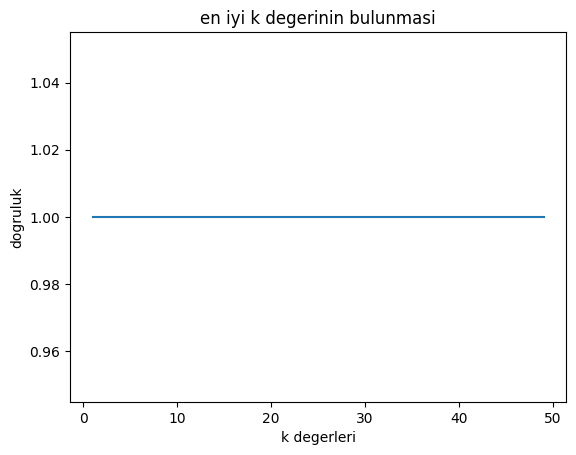

In [36]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel("k degerleri")
plt.ylabel("dogruluk")
plt.title("en iyi k degerinin bulunmasi")
plt.show()

# destek vektör makinesi
* egitim verilerinindeki herhangi bir noktadan en uzak olan iki sınıf arasindaki bir karar sınırı bulan vektör tabanlı makine ogrenme yontemi olarak tanımlanır.


In [38]:
# destek vektör makinesi içe aktar
from sklearn.svm import SVC

# destek vektör makinesi egitimi
svm = SVC(random_state=1)
svm.fit(x_train,y_train)

# TEST
print("destek vektör makinesi modeli test dogrulugu: {}".format(svm.score(x_test,y_test)))

ValueError: The number of classes has to be greater than one; got 1 class

# karar agaci
* her dahili dugumun bir öznitelik uzerindeki bir testi, her dalın testin sonucu ve her yaprak dugumunun bir sınıf etiketini temsil ettigi akis semasina benzer bir yapidir.

In [39]:
# karar agaci ice aktar
from sklearn.tree import DecisionTreeClassifier

# karar agaci egitimi
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("karar agaci modeli test dogruluk: {}".format(dt.score(x_test,y_test)))

karar agaci modeli test dogruluk: 1.0


# rastgele Orman

* cok sayida karar agaci olusturarak prolemin tipine göre sinif tahmini yapan bir toplu ogrenme yontemidir.

In [40]:
# rastgele orman ice aktar
from sklearn.ensemble import RandomForestClassifier

# rastgele orman egitimi
rf = RandomForestClassifier(n_estimators= 100, random_state=1)
rf.fit(x_train,y_train)

print("rastgele orman modeli test dogruluk: {}". format(dt.score(x_test,y_test)))

rastgele orman modeli test dogruluk: 1.0


# siniflandirma modellerinin degerlendirilmesi

* Dogruluk = bir olcum sisteminin dogrulugu, bir niceligi olcum degerine olan yakinlik derecesidir.
  
* makine ogrenimi ve ozellikle istatistiksel siniflandirma probleminde hata matrisi olarak da bilinen bir karisiklik matrisi, bir algoritmanın performansının tipik olarak denetimli bir ogrenme olanının gorsellestirmesine izin veren ozel bir tablo duzenidir.


In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred  = rf.predict(x_test)
cm  =confusion_matrix(y_test,y_pred)
cm

c:\Users\emreu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[47]], dtype=int64)

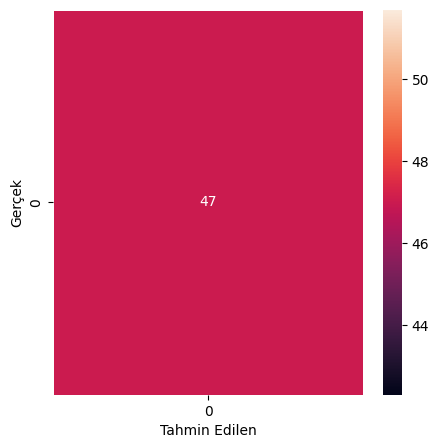

In [45]:
# İstenilen boyutta bir figür oluşturun
fig, ax = plt.subplots(figsize=(5, 5))

# Seaborn ile ısı haritası oluşturun
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="white", fmt=".0f", ax=ax)

# Eksen etiketleri ekleyin
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")

# Grafiği göster
plt.show()